In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('datasets/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [5]:
df.sort_values(by='Year_of_Release')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
262,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,NaN,NaN,NaN,NaN,NaN,NaN
5360,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34,NaN,NaN,NaN,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
2650,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,NaN,NaN,NaN,NaN,NaN,NaN
4019,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.0,0.00,0.01,43.0,7.0,NaN,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df['Global_Sales'].sum())
print(len(df['Publisher'].unique()))
print(len(df['Name'].unique()))
print(len(df['Platform'].unique()))

8920.300000000001
583
11563
31


In [7]:
five_years = df[df['Year_of_Release']>2010]

print(five_years['Global_Sales'].sum())
print(len(five_years['Publisher'].unique()))
print(len(five_years['Name'].unique()))
print(len(five_years['Platform'].unique()))

1954.8799999999994
227
2421
12


In [8]:
five_years['Platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df[df['Year_of_Release']<2017]
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,0.536361,68.994363,26.441313,7.126330,163.015141
std,5.877050,0.818416,0.506696,0.311082,0.187994,1.558610,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [11]:
na_sales = df['NA_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
eu_sales = df['EU_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
jp_sales = df['JP_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
other_sales = df['Other_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
total_sales = df['Global_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()


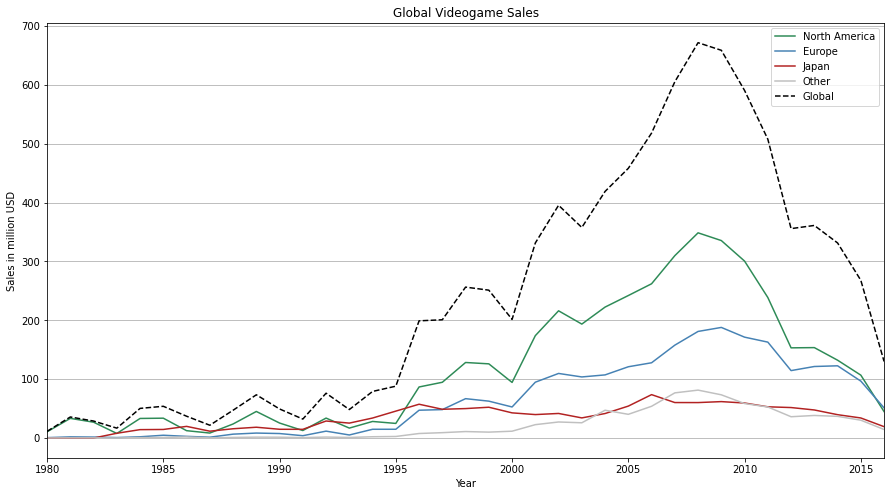

In [55]:
plt.figure(figsize=(15,8))

plt.plot(na_sales.Year_of_Release,na_sales.NA_Sales, color='seagreen', label='North America')
plt.plot(eu_sales.Year_of_Release,eu_sales.EU_Sales, color='steelblue', label = 'Europe')
plt.plot(jp_sales.Year_of_Release, jp_sales.JP_Sales, color = 'firebrick', label= 'Japan')
plt.plot(other_sales.Year_of_Release, other_sales.Other_Sales, color = 'silver', label='Other')
plt.plot(total_sales.Year_of_Release, total_sales.Global_Sales, color = 'black', ls='--', label = 'Global')

plt.xlabel('Year')
plt.ylabel('Sales in million USD')
plt.xlim(1980,2016)
plt.grid(b=None, which='major', axis='y')
plt.title("Global Videogame Sales")
plt.legend()

plt.show()

In [13]:
top_10_games = df.groupby(df.Name).agg('sum').reset_index().sort_values(by=['Global_Sales'], ascending=False)

top_10_games = top_10_games[top_10_games.Year_of_Release>2014]

top_10_games = top_10_games[['Name','Other_Sales','EU_Sales','JP_Sales', 'NA_Sales']].head(20)

top_10_games


,Name,Other_Sales,EU_Sales,JP_Sales,NA_Sales
3694,Grand Theft Auto V,7.90,23.42,1.42,23.84
9288,Super Mario Bros.,0.99,4.88,6.96,32.48
9671,Tetris,0.69,2.95,6.03,26.17
1232,Call of Duty: Modern Warfare 3,3.29,11.15,0.62,15.54
1227,Call of Duty: Black Ops II,3.76,10.84,0.72,14.08
1225,Call of Duty: Black Ops,3.08,8.54,0.59,16.99
1229,Call of Duty: Ghosts,3.08,8.89,0.48,14.94
9302,Super Mario World,0.75,4.86,4.49,15.99
1226,Call of Duty: Black Ops 3,3.49,9.49,0.44,12.25
1231,Call of Duty: Modern Warfare 2,2.97,8.02,0.46,13.52


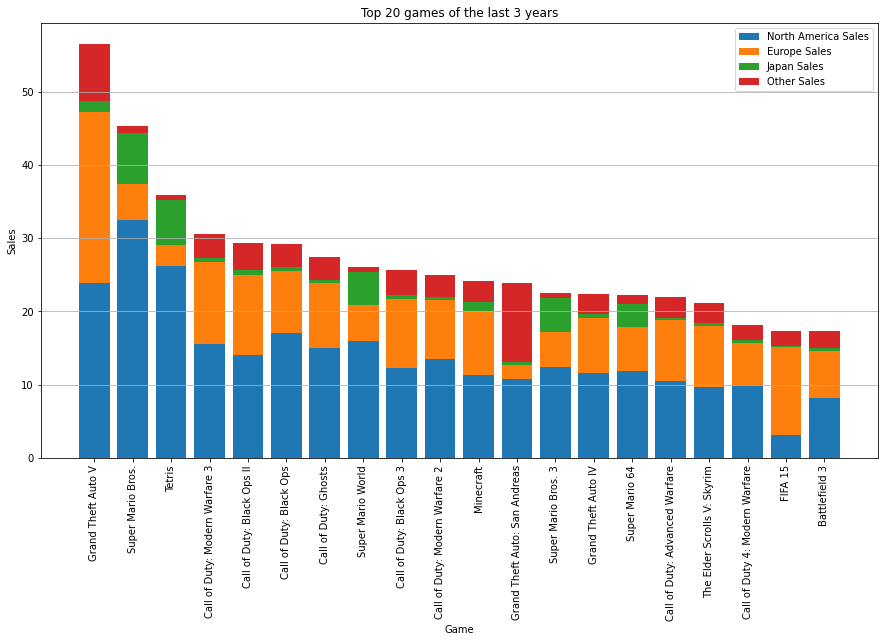

In [14]:
plt.figure(figsize=(15,8))

NA_Sales = top_10_games.NA_Sales
EU_Sales = top_10_games.EU_Sales
JP_Sales = top_10_games.JP_Sales
Other_Sales = top_10_games.Other_Sales
games = top_10_games.Name

plt.bar(games, NA_Sales, label= 'North America Sales')
plt.bar(games,EU_Sales, bottom=NA_Sales, label='Europe Sales')
plt.bar(games, JP_Sales, bottom=(NA_Sales+EU_Sales), label='Japan Sales')
plt.bar(games, Other_Sales, bottom=(NA_Sales+EU_Sales+JP_Sales), label='Other Sales')

plt.xlabel('Game')
plt.ylabel('Sales')
plt.grid(b=None, which='major', axis='y')
plt.title("Top 20 games of the last 3 years")
plt.legend()
plt.xticks(rotation=90)

plt.show()

### Global Launches and industry value

In [15]:
launches_per_year = df['Name'].groupby(df.Year_of_Release).agg('count').reset_index()

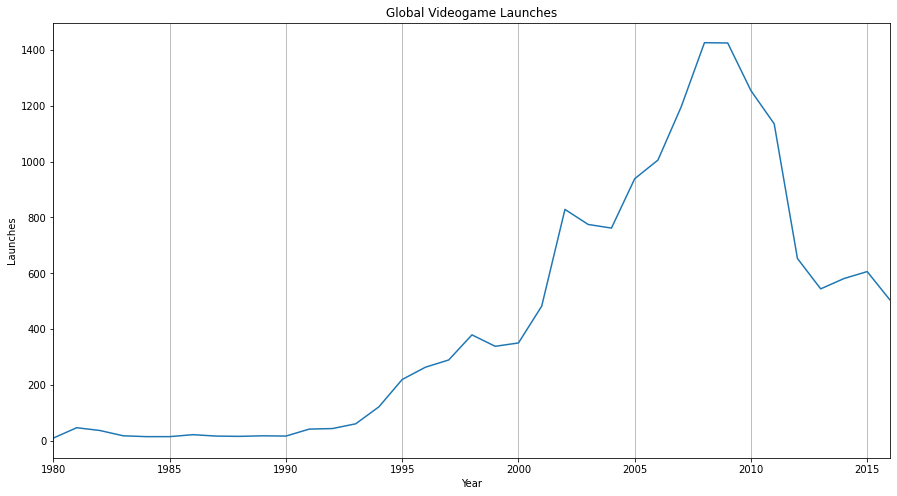

In [16]:
plt.figure(figsize=(15,8))

plt.plot(launches_per_year.Year_of_Release, launches_per_year.Name)

plt.xlabel('Year')
plt.ylabel('Launches')
plt.xlim(1980,2016)
plt.grid(b=None, which='major', axis='x')
plt.title("Global Videogame Launches")

plt.show()

In [17]:
print(df.Global_Sales.sum())
print(df.Name.count())

8820.990000000002
16444


### launches and sales per console

In [18]:
launches_per_platform = df.Name.groupby(df.Platform).agg('count').reset_index().sort_values(by=['Name'])
sales_per_platform = df.Global_Sales.groupby(df.Platform).agg('sum').reset_index().sort_values(by=['Global_Sales'])

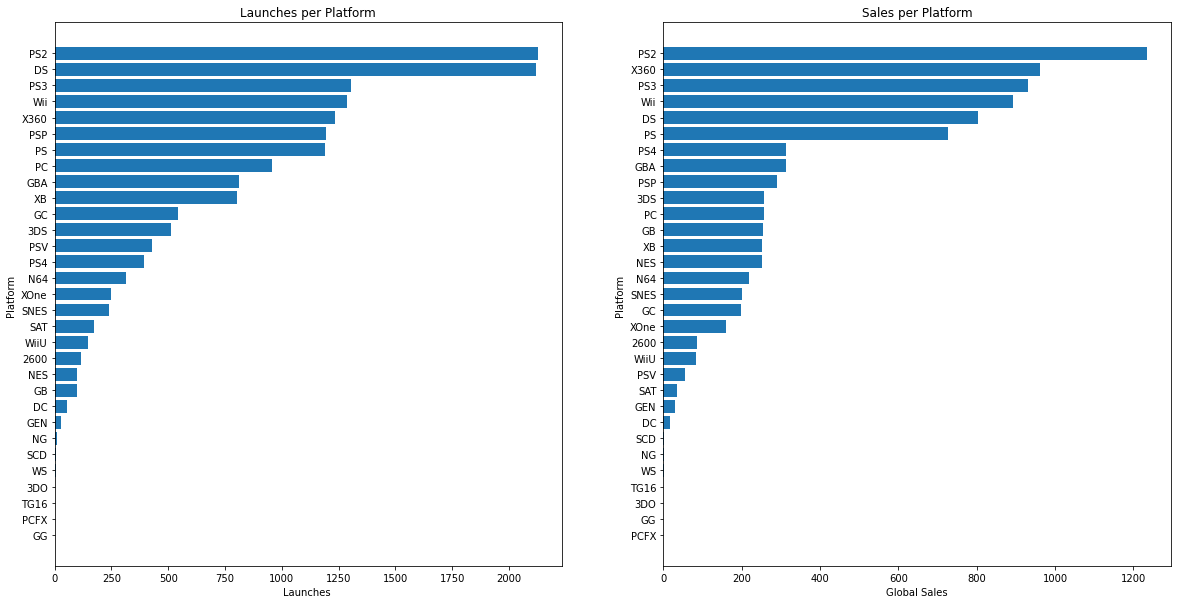

In [19]:
#plt.subplot(1, 2,1, ) # row 1, col 2 index 1
#plt.figure(figsize=(15,8))

f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
x = np.linspace(0,4,1000)


ax.barh(launches_per_platform['Platform'], launches_per_platform['Name'])
ax.set_title("Launches per Platform")
ax.set_xlabel('Launches ')
ax.set_ylabel('Platform ')

ax2.barh(sales_per_platform['Platform'], sales_per_platform['Global_Sales'])
ax2.set_title("Sales per Platform")
ax2.set_xlabel('Global Sales')
ax2.set_ylabel('Platform ')



plt.show()

In [20]:
sales_by_country = df[['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']].sum().sort_values()
sales_by_country

Other_Sales     782.71
JP_Sales       1290.67
EU_Sales       2400.21
NA_Sales       4343.20
dtype: float64

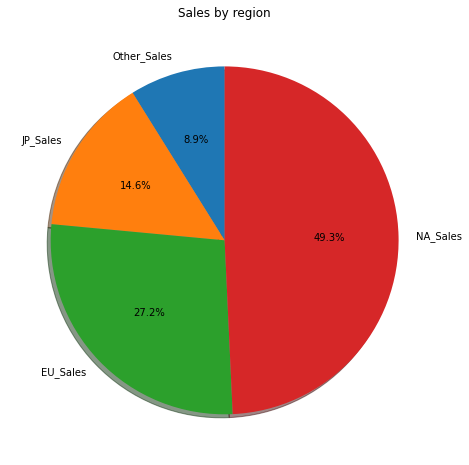

In [34]:
plt.figure(figsize=(15,8))

pie_values = sales_by_country.tolist()
pie_labels = sales_by_country.index.values.tolist()

plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Sales by region")

plt.show()

### Sales based on Platform

In [22]:
last_gen_df = df[df['Platform'].isin(['PS4', 'XOne', 'WiiU'])]
last_gen_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ps4 = df[df['Platform']=='PS4']
ps4 = ps4[['Name','Global_Sales','Platform']]

estadisticos_ps4 = ps4.describe().transpose()
estadisticos_ps4['IQR'] = estadisticos_ps4['75%'] - estadisticos_ps4['25%']

print(estadisticos_ps4)

ps4_outliers = pd.DataFrame(columns=ps4.columns)

for col in estadisticos_ps4.index:
    iqr = estadisticos_ps4.at[col, 'IQR']
    corte = iqr
    lower = estadisticos_ps4.at[col, '25%'] - corte
    upper = estadisticos_ps4.at[col, '75%'] + corte
    resultados = ps4[(ps4[col] < lower) | (ps4[col] > upper)].copy()
    ps4_outliers = ps4_outliers.append(resultados)
    
ps4_sin_outliers = pd.merge(ps4,ps4_outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

print(len(ps4))
print(len(ps4_sin_outliers))

              count      mean       std   min   25%  50%     75%    max  \
Global_Sales  392.0  0.801505  1.608741  0.01  0.06  0.2  0.7325  14.63   

                 IQR  
Global_Sales  0.6725  
392
327


In [24]:
xbox = df[df['Platform']=='XOne']
xbox = xbox[['Name','Global_Sales','Platform']]

estadisticos_xbox = xbox.describe().transpose()
estadisticos_xbox['IQR'] = estadisticos_xbox['75%'] - estadisticos_xbox['25%']

xbox_outliers = pd.DataFrame(columns=xbox.columns)

for col in estadisticos_xbox.index:
    iqr = estadisticos_xbox.at[col, 'IQR']
    corte = iqr
    lower = estadisticos_xbox.at[col, '25%'] - corte
    upper = estadisticos_xbox.at[col, '75%'] + corte
    resultados = xbox[(xbox[col] < lower) | (xbox[col]>upper)].copy()
    xbox_outliers = xbox_outliers.append(resultados)

xbox_sin_outliers = pd.merge(xbox,xbox_outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

print(len(xbox))
print(len(xbox_sin_outliers))

247
209


In [25]:
wiiu = df[df['Platform']=='WiiU']
wiiu = wiiu[['Name','Global_Sales','Platform']]

estadisticos_wiiu = wiiu.describe().transpose()
estadisticos_wiiu['IQR'] = estadisticos_wiiu['75%'] - estadisticos_wiiu['25%']

wiiu_outliers = pd.DataFrame(columns=wiiu.columns)

for col in estadisticos_wiiu.index:
    iqr = estadisticos_wiiu.at[col, 'IQR']
    corte = iqr
    lower = estadisticos_wiiu.at[col, '25%'] - iqr
    upper = estadisticos_wiiu.at[col, '75%'] + iqr
    resultados = wiiu[(wiiu[col] < lower) | (wiiu[col]>upper)].copy()
    wiiu_outliers = wiiu_outliers.append(resultados)

wiiu_sin_outliers = pd.merge(wiiu,wiiu_outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

print(len(wiiu))
print(len(wiiu_sin_outliers))

147
127


In [26]:
last_gen_clean = pd.concat([ps4_sin_outliers, xbox_sin_outliers, wiiu_sin_outliers])

len(last_gen_clean)

663

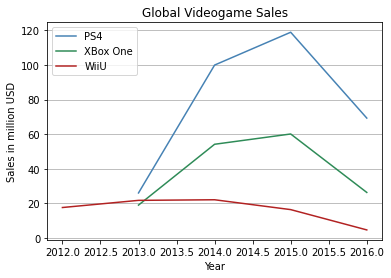

In [53]:
# tendencia de ventas por consola

ps4 = last_gen_df[last_gen_df['Platform']=='PS4']
ps4 = ps4['Global_Sales'].groupby(ps4['Year_of_Release']).agg('sum').reset_index()

xbox = last_gen_df[last_gen_df['Platform']=='XOne']
xbox = xbox['Global_Sales'].groupby(xbox['Year_of_Release']).agg('sum').reset_index()

wiiu = last_gen_df[last_gen_df['Platform']=='WiiU']
wiiu = wiiu['Global_Sales'].groupby(wiiu['Year_of_Release']).agg('sum').reset_index()


plt.plot(ps4.Year_of_Release,ps4.Global_Sales, color='steelblue', label='PS4')
plt.plot(xbox.Year_of_Release,xbox.Global_Sales, color='seagreen', label = 'XBox One')
plt.plot(wiiu.Year_of_Release, wiiu.Global_Sales, color = 'firebrick', label= 'WiiU')

plt.xlabel('Year')
plt.ylabel('Sales in million USD')
plt.grid(b=None, which='major', axis='y')
plt.title("Global Videogame Sales")
plt.legend()

plt.show()

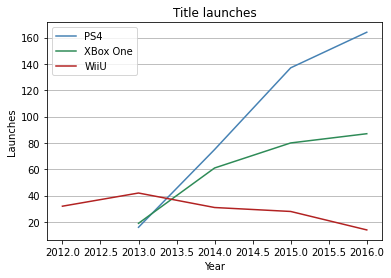

In [54]:
#plt.figure(figsize=(15,8))

ps4 = last_gen_df[last_gen_df['Platform']=='PS4']
ps4 = ps4['Name'].groupby(ps4['Year_of_Release']).agg('count').reset_index()

xbox = last_gen_df[last_gen_df['Platform']=='XOne']
xbox = xbox['Name'].groupby(xbox['Year_of_Release']).agg('count').reset_index()

wiiu = last_gen_df[last_gen_df['Platform']=='WiiU']
wiiu = wiiu['Name'].groupby(wiiu['Year_of_Release']).agg('count').reset_index()


plt.plot(ps4.Year_of_Release,ps4.Name, color='steelblue', label='PS4')
plt.plot(xbox.Year_of_Release,xbox.Name, color='seagreen', label = 'XBox One')
plt.plot(wiiu.Year_of_Release, wiiu.Name, color = 'firebrick', label= 'WiiU')

plt.xlabel('Year')
plt.ylabel('Launches')
plt.grid(b=None, which='major', axis='y')
plt.title("Title launches")
plt.legend()

plt.show()

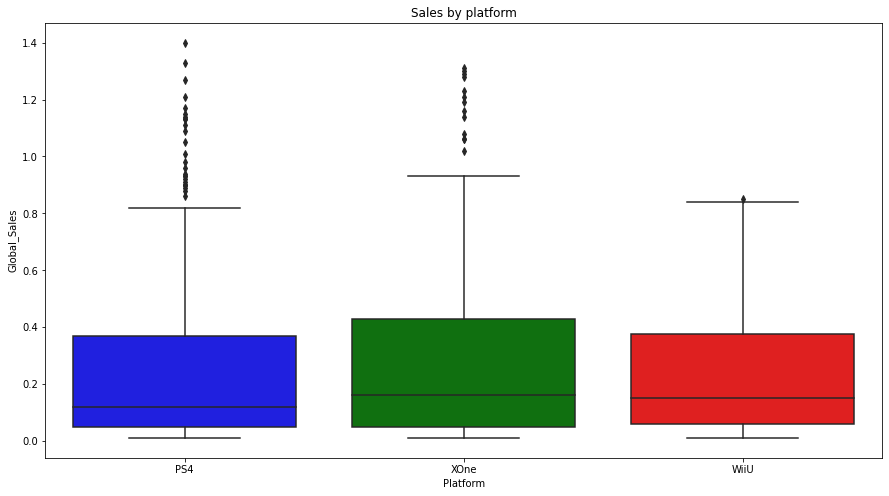

In [35]:
plt.figure(figsize=(15,8))

plt.xlabel('Platform')
plt.ylabel('Sales in Million USD')
plt.grid(b=None, which='major', axis='x')
plt.title("Sales by platform")

my_pal = {"PS4": "b", "XOne": "g", "WiiU":"r"}
sns.boxplot(x=last_gen_clean.Platform, y=last_gen_clean.Global_Sales, data=last_gen_clean.Name, palette=my_pal)

plt.show()

# Genre influence

In [28]:
genre_df_sales = last_gen_df['Global_Sales'].groupby(last_gen_df['Genre']).agg('mean').reset_index()
genre_df_titles = last_gen_df['Name'].groupby(last_gen_df['Genre']).agg('count').reset_index()

genre_df = pd.merge(genre_df_sales,genre_df_titles)

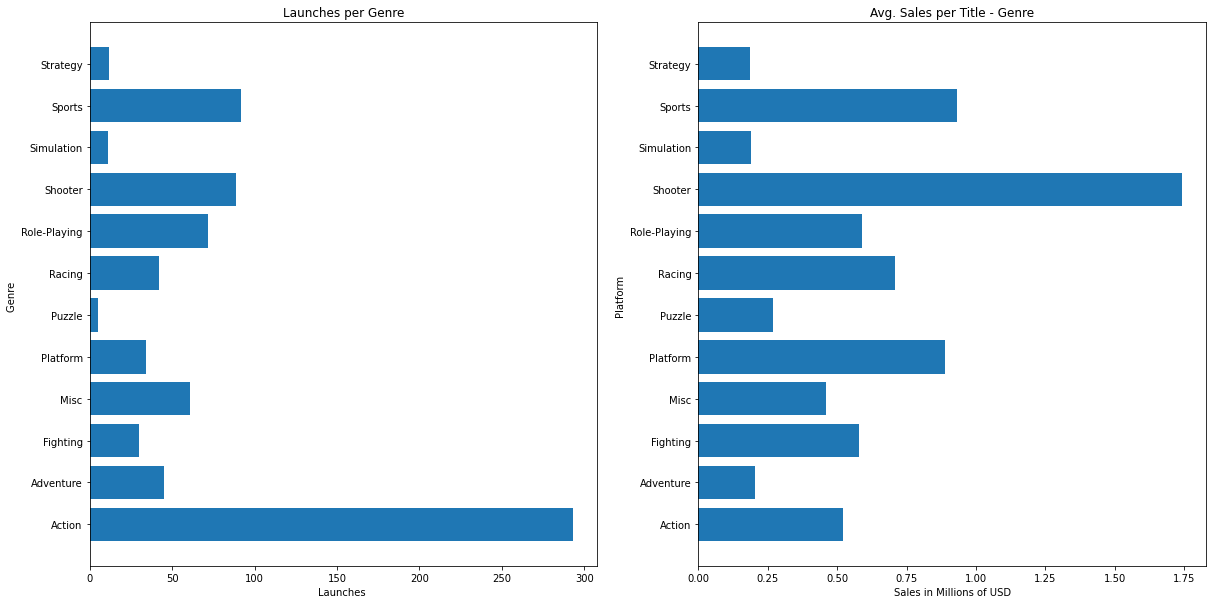

In [33]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
x = np.linspace(0,5,1000)


ax.barh(genre_df['Genre'], genre_df['Name'])
ax.set_title("Launches per Genre")
ax.set_xlabel('Launches ')
ax.set_ylabel('Genre ')

ax2.barh(genre_df['Genre'], genre_df['Global_Sales'])
ax2.set_title("Avg. Sales per Title - Genre")
ax2.set_xlabel('Sales in Millions of USD')
ax2.set_ylabel('Platform ')



plt.show()

# Ratings relations

In [30]:
score_sales_corr = last_gen_df[['Global_Sales', 'User_Score', 'Critic_Score']].corr()

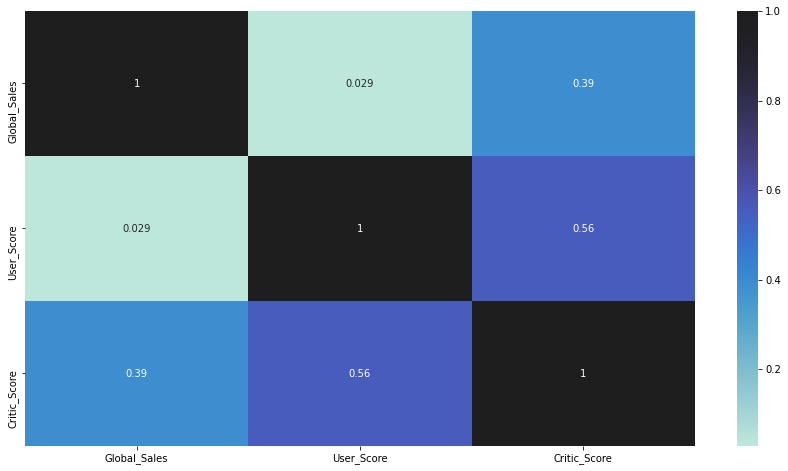

In [37]:
plt.figure(figsize=(15,8))

sns.heatmap(score_sales_corr, annot=True, center=1)
plt.show()